In [1]:
#import libraries
from glob import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import liraries for model building and testing the model accuracy
from sklearn import model_selection
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# load all the datasets
data_00 = pd.read_csv("dataset-of-00s.csv")
data_10 = pd.read_csv("dataset-of-10s.csv")
data_60 = pd.read_csv("dataset-of-60s.csv")
data_70 = pd.read_csv("dataset-of-70s.csv")
data_80 = pd.read_csv("dataset-of-80s.csv")
data_90 = pd.read_csv("dataset-of-90s.csv")

In [4]:
#sort the data
stacked = sorted(glob('dataset-of-*.csv'))

In [5]:
final_data = pd.concat((pd.read_csv(file).assign(filename = file)
          for file in stacked),ignore_index = True)

In [6]:
final_data.head(10)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,filename
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.1590,0.532,133.061,196707,4,30.88059,13,1,dataset-of-00s.csv
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.1480,0.688,92.988,242587,4,41.51106,10,1,dataset-of-00s.csv
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.1740,0.300,86.964,338893,4,65.32887,13,0,dataset-of-00s.csv
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.1920,0.333,148.440,255667,4,58.59528,9,0,dataset-of-00s.csv
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.1250,0.631,112.098,193760,4,22.62384,10,1,dataset-of-00s.csv
5,Dantzig Station,State Of Art,spotify:track:5Z3nrC0JbJmXaOGiXTuNFk,0.726,0.837,11,-7.223,0,0.0965,0.373000,0.26800,0.1360,0.969,135.347,192720,4,28.29051,10,0,dataset-of-00s.csv
6,Divorced,Blacklisted,spotify:track:0iAdSLiQBIizTAiLUP7p5E,0.365,0.922,1,-2.644,1,0.0710,0.002850,0.00000,0.3210,0.290,77.250,89427,4,45.77202,4,0,dataset-of-00s.csv
7,Where I Come From,Alan Jackson,spotify:track:6ej1QJ8eIYmhsyTlvgDajy,0.726,0.631,11,-8.136,0,0.0334,0.220000,0.00000,0.1930,0.746,124.711,239240,4,35.59732,10,1,dataset-of-00s.csv
8,Nothin' To Die For,Tim McGraw,spotify:track:3lRSz6HujrSy9b3LXg2Kq9,0.481,0.786,10,-5.654,1,0.0288,0.053800,0.00000,0.0759,0.389,153.105,253640,4,19.65701,11,1,dataset-of-00s.csv
9,I Want to Know Your Plans,Say Anything,spotify:track:3pjnCLIHbRczUjenWOEo56,0.647,0.324,7,-9.679,1,0.0377,0.354000,0.00000,0.1150,0.344,124.213,314286,3,32.66343,16,0,dataset-of-00s.csv


In [7]:
# Renaming the column 'filename' to 'year' 
final_data.rename({'filename':'year'}, inplace = True, axis = 1)

In [8]:
final_data.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target', 'year'],
      dtype='object')

In [9]:
final_data['year'].unique()

array(['dataset-of-00s.csv', 'dataset-of-10s.csv', 'dataset-of-60s.csv',
       'dataset-of-70s.csv', 'dataset-of-80s.csv', 'dataset-of-90s.csv'],
      dtype=object)

In [10]:
# Replacing the values within year column to years sccording to the data provided
final_data['year'].replace(['dataset-of-00s.csv', 'dataset-of-10s.csv', 'dataset-of-60s.csv',
       'dataset-of-70s.csv', 'dataset-of-80s.csv', 'dataset-of-90s.csv'],['2000','2010','1960','1970','1980','1990'], inplace = True)

In [11]:
final_data.head(3)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,year
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1,2000
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1,2000
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0,2000


In [12]:
# Let's see shape of the data
final_data.shape

(41106, 20)

# Stastical Analysis

In [13]:
final_data.describe(percentiles=[0.5,0.6,0.7,0.8,0.9])

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,4.110600e+04,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,0.500000
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,0.500000
60%,0.598000,0.676000,7.000000,-8.059000,1.000000,0.049900,0.416000,0.001240,0.164000,0.644000,124.513000,2.349200e+05,4.000000,39.804510,11.000000,1.000000
70%,0.645000,0.747000,8.000000,-6.930000,1.000000,0.061300,0.593000,0.014400,0.221000,0.727000,131.863000,2.545600e+05,4.000000,44.672095,12.000000,1.000000
80%,0.696000,0.826000,9.000000,-5.814000,1.000000,0.083100,0.752000,0.242000,0.303000,0.810000,141.831000,2.822270e+05,4.000000,51.213070,13.000000,1.000000
90%,0.762000,0.907000,10.000000,-4.613000,1.000000,0.147000,0.897000,0.808000,0.395000,0.900000,160.907500,3.344825e+05,4.000000,62.974340,15.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


In [14]:
final_data.target.value_counts()

1    20553
0    20553
Name: target, dtype: int64

#we can say it's balanced dataset

c:\users\shesh\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

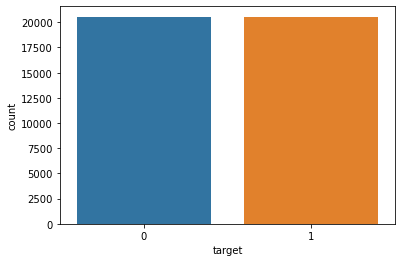

In [15]:
sns.countplot(final_data['target'])

In [16]:
#basic information
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

In [17]:
# Count of unique values
final_data.nunique()

track               35860
artist              11904
uri                 40560
danceability         1048
energy               1787
key                    12
loudness            16160
mode                    2
speechiness          1346
acousticness         4194
instrumentalness     5122
liveness             1674
valence              1609
tempo               32152
duration_ms         21517
time_signature          5
chorus_hit          39950
sections               84
target                  2
year                    6
dtype: int64

# Correlation Plot

<AxesSubplot:>

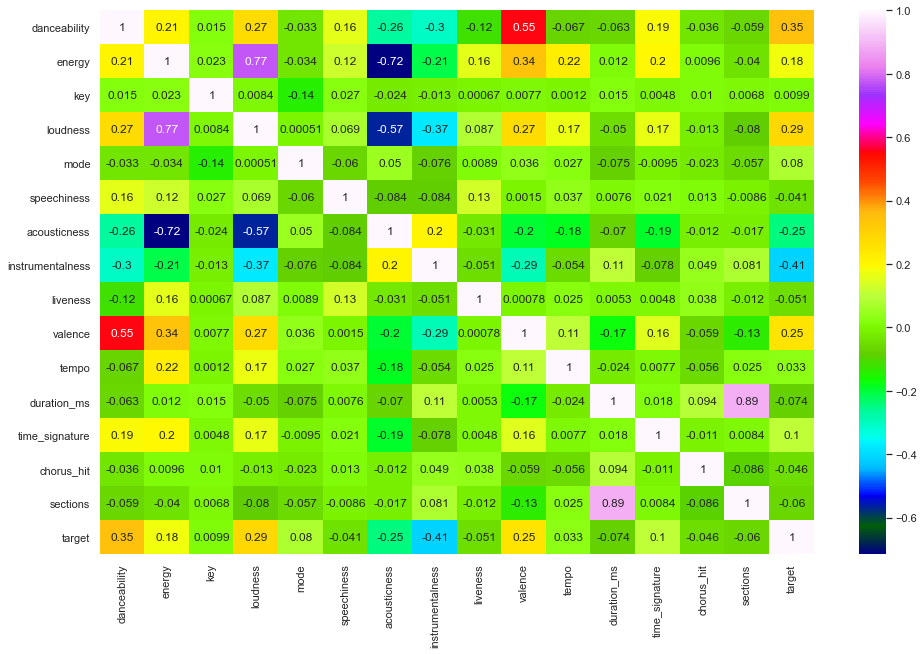

In [18]:
plt.figure(figsize=(16,10))
sns.set(style='whitegrid')
corr = final_data.corr()
sns.heatmap(corr,cmap='gist_ncar',annot=True)

# Univariant Analysis

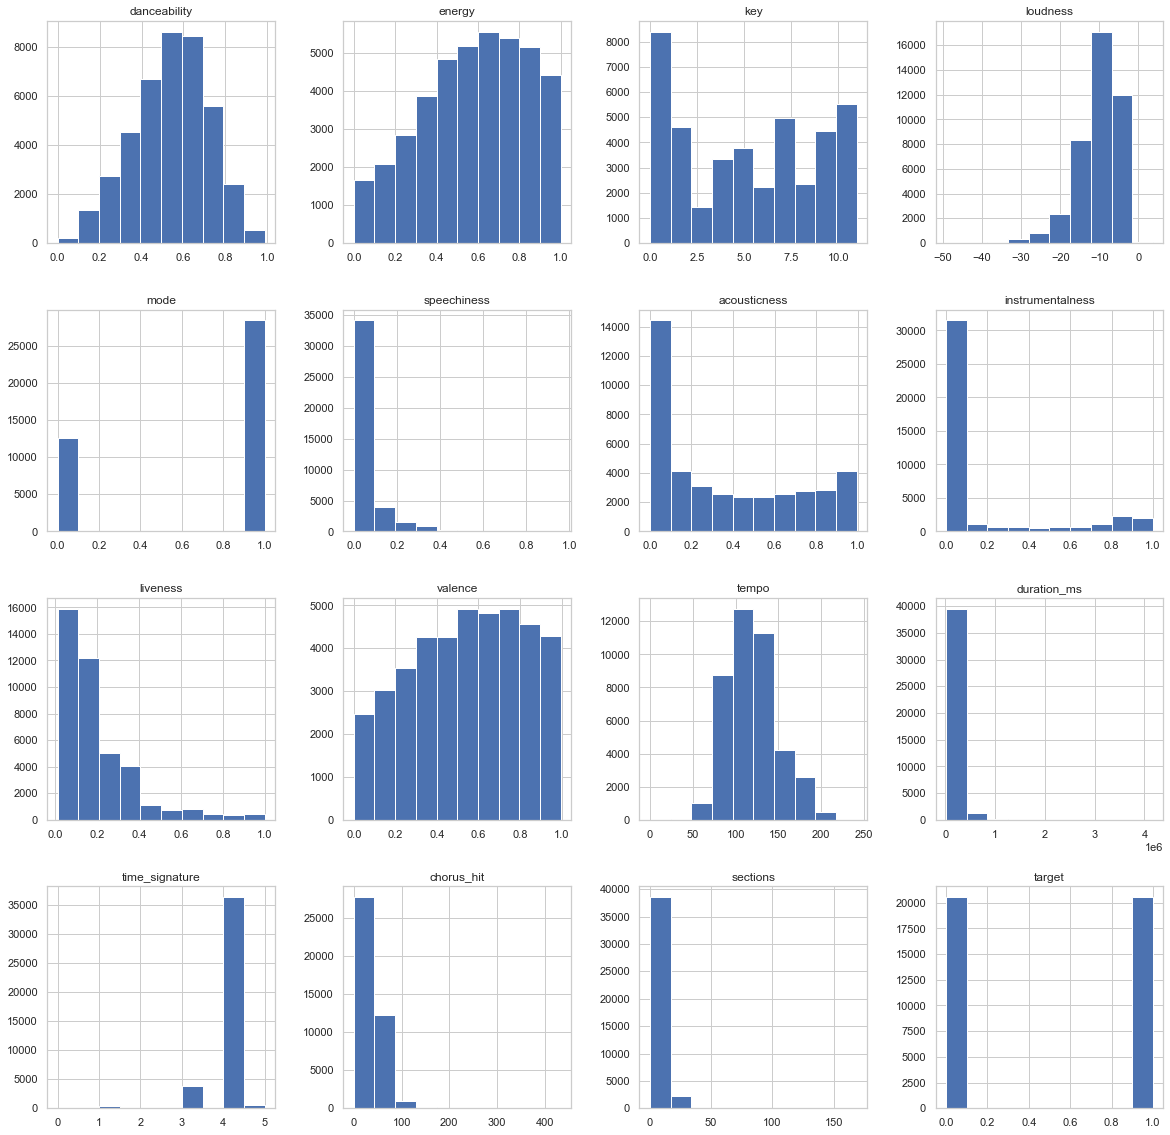

In [19]:
final_data.hist(figsize=(20,20))
plt.show()

# Distribution Plot of few features

c:\users\shesh\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='energy', ylabel='Density'>

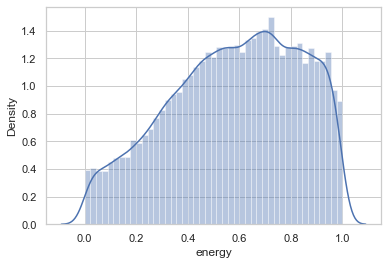

In [20]:
sns.distplot(final_data['energy'])

c:\users\shesh\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='danceability', ylabel='Density'>

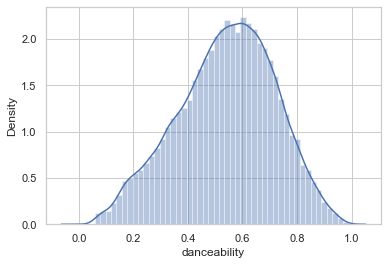

In [21]:
sns.distplot(final_data['danceability'])

c:\users\shesh\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='acousticness', ylabel='Density'>

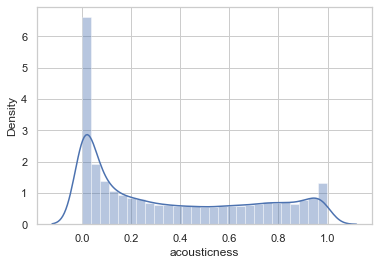

In [22]:
sns.distplot(final_data['acousticness'])

c:\users\shesh\anaconda3\envs\myenv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loudness', ylabel='Density'>

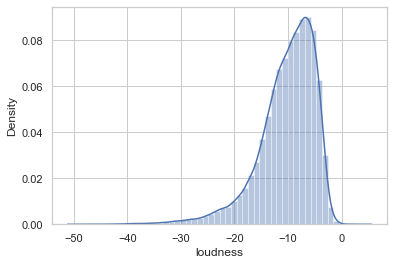

In [23]:
sns.distplot(final_data['loudness'])

# Bivariant Analysis

Line Plot of few features

<AxesSubplot:xlabel='year', ylabel='speechiness'>

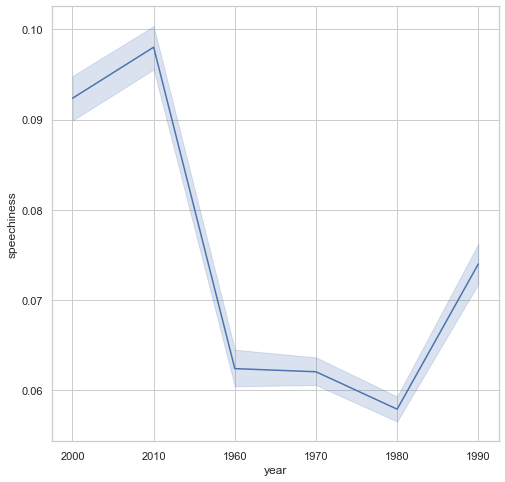

In [24]:
fig,ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'year', y = 'speechiness', data = final_data)

<AxesSubplot:xlabel='year', ylabel='acousticness'>

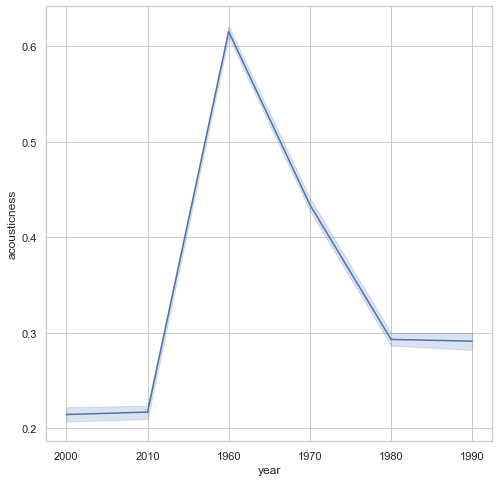

In [25]:
fig,ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'year', y = 'acousticness', data = final_data)

<AxesSubplot:xlabel='year', ylabel='loudness'>

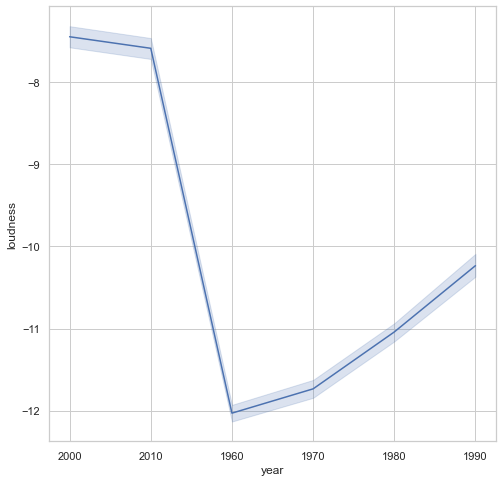

In [26]:

fig,ax = plt.subplots(figsize=(8,8))
sns.lineplot(x = 'year', y = 'loudness' , data = final_data)

In [27]:
# Most energetic song
final_data[final_data.energy == np.max(final_data.energy)]

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,year
29726,Endless Rain,Nataural,spotify:track:3xNMoalU3NRwgcQMfpNnmo,0.131,1.0,0,-13.429,1,0.0403,0.793,0.548,0.963,0.00001,100.661,128615,3,24.89065,8,0,1980
29976,Dripping Rain,Nataural,spotify:track:0TWYYsAFK3Hg2k3rob8mCb,0.154,1.0,7,-10.996,1,0.0827,0.160,0.988,0.891,0.00001,134.026,190334,4,26.65989,10,0,1980
34638,Under Shelter Rain,Nataural,spotify:track:4WjgebiAotVKXyxix0oQRa,0.168,1.0,6,-10.890,0,0.0836,0.139,0.999,0.928,0.00001,113.632,167137,3,22.71794,10,0,1980
34936,Pouring Rain,Nataural,spotify:track:07ILGDMJdj609RqKaoDiVz,0.162,1.0,11,-11.068,0,0.0622,0.124,0.990,0.918,0.00001,82.055,162122,4,31.34900,6,0,1980


In [28]:
# Most Dancable song
final_data[final_data.danceability == np.max(final_data.danceability)]

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,year
35348,Funky Cold Medina,Tone-Loc,spotify:track:5YIF6HSOtHN9HdcE5IPzMe,0.988,0.633,5,-15.012,0,0.0888,0.0755,0.000002,0.0668,0.929,117.493,248160,4,48.94409,13,1,1980


In [29]:
# Most loudest song
final_data[final_data.duration_ms == np.max(final_data.duration_ms)]

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,year
4282,42 vexations,Dom Pub,spotify:track:60qgoupfzVr4Bccw5U1DAe,0.675,0.00766,11,-32.584,1,0.3,0.996,0.97,0.0994,0.38,130.817,4170227,4,29.46306,169,0,2000


In [30]:
# Most lengthy song
final_data[final_data.loudness == np.max(final_data.loudness)]

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,year
28561,Your Pretty Face Is Going to Hell - Alternate ...,The Stooges,spotify:track:0Aveu2KsriohUafrrerz1F,0.186,0.997,9,3.744,1,0.154,0.000467,0.0202,0.0644,0.107,157.047,294467,4,37.49109,13,0,1970


In [31]:
# Top 10 Dancable songs
final_data[['artist','track','danceability','year']].sort_values('danceability',ascending = False)[0:10]

,artist,track,danceability,year
35348,Tone-Loc,Funky Cold Medina,0.988,1980
2653,Pitbull Featuring Trina & Young Bo$$,Go Girl,0.986,2000
8870,DJ Suede The Remix God,Cash Me Outside (#CashMeOutside),0.981,2010
8262,Glee Cast,Ice Ice Baby,0.980,2010
33104,The Jacksons,State of Shock,0.980,1980
40223,Vanilla Ice,Ice Ice Baby,0.979,1990
31528,Dr. Jeckyll & Mr. Hyde,Butt Naked,0.978,1980
4578,Timbaland Featuring Nelly Furtado & Justin Tim...,Give It To Me,0.978,2000
8897,Ambjaay,Uno,0.978,2010
39846,Barney,Barney Theme Song,0.976,1990


In [32]:
# Top 10 energetic songs
final_data[['artist','track','energy','year']].sort_values('energy',ascending = False)[0:10]

,artist,track,energy,year
29976,Nataural,Dripping Rain,1.000,1980
29726,Nataural,Endless Rain,1.000,1980
34936,Nataural,Pouring Rain,1.000,1980
34638,Nataural,Under Shelter Rain,1.000,1980
5724,Pig Destroyer,Pretty In Casts,0.999,2000
3494,Andrew Spencer,Zombie - Ray Knox Remix Edit,0.999,2000
6072,Invincible Force,Sacrifice,0.999,2010
23430,Crass,They've Got a Bomb,0.999,1970
4200,Baracuda,Ass Up - Ic3m4n Remix Short,0.999,2000
307,The Casualties,Punk Rock Love,0.999,2000


Text(0.5, 0, 'Year')

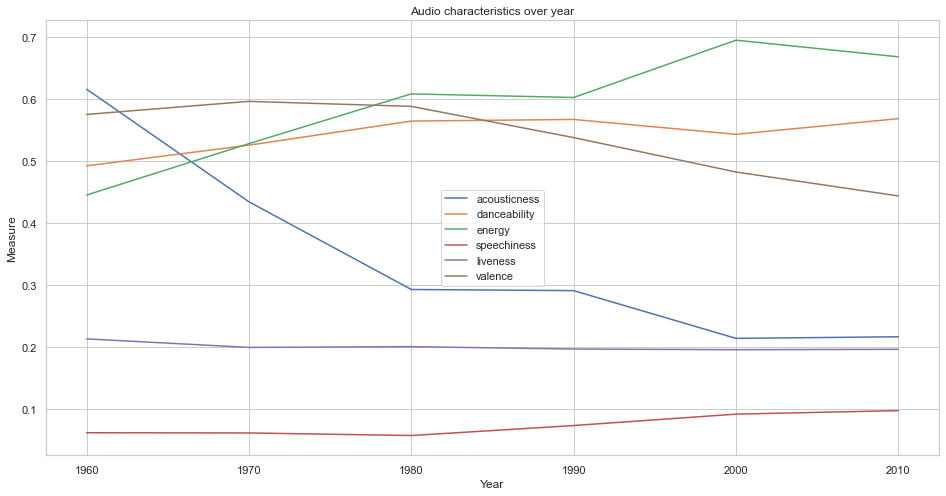

In [33]:
# Comparision of features in a single plot
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["acousticness","danceability","energy","speechiness","liveness","valence"]
for col in columns:
    x = final_data.groupby("year")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('Audio characteristics over year')
ax.set_ylabel('Measure')
ax.set_xlabel('Year')

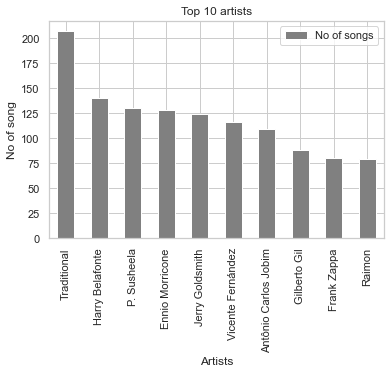

In [34]:
# Top 10 artists
Top10 = pd.DataFrame({'No of songs':final_data['artist'].value_counts().head(10)})
Top10.plot.bar(color='grey')
plt.title('Top 10 artists')
plt.xlabel('Artists')
plt.ylabel('No of song')
plt.show()

In [35]:
#features to be removed
feature_names = list(final_data.columns.values)
feature_names.remove('target')
feature_names.remove('track')
feature_names.remove('uri')
feature_names.remove('year')
feature_names.remove('artist')

X = final_data[feature_names]
Y = final_data['target']

#split the data in train and test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [36]:
feature_names

['danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature',
 'chorus_hit',
 'sections']

# MODEL BUILDING


# LOGISTIC REGRESSION


In [37]:
LR_Model = LogisticRegression()
LR_Model.fit(X_train, Y_train)
LR_Predict = LR_Model.predict(X_test)
LR_Accuracy = accuracy_score(Y_test, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

LR_AUC = roc_auc_score(Y_test, LR_Predict) 
print("AUC: " + str(LR_AUC))

Accuracy: 0.5075407443444417
AUC: 0.5075155986719065


In [38]:
cm = confusion_matrix(Y_test, LR_Predict)
print(cm)

[[1873 2236]
 [1813 2300]]


In [39]:
def performance(cm):
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN) 
    
    print('Sensitivity : ', TPR)
    print('Specificity : ', TNR)
    print('Precision : ', PPV)
    print('Negative predictive value : ', NPV)
    print('False positive rate : ', FPR)
    print('False negative rate : ', FNR)
    print('False discovery rate : ', FDR)
    print('Accuracy : ', ACC)

In [40]:
performance(cm)

Sensitivity :  0.5592025285679553
Specificity :  0.45582866877585787
Precision :  0.5070546737213404
Negative predictive value :  0.5081389039609333
False positive rate :  0.5441713312241421
False negative rate :  0.44079747143204473
False discovery rate :  0.4929453262786596
Accuracy :  0.5075407443444417


In [41]:
print(classification_report(Y_test, LR_Predict))

              precision    recall  f1-score   support

           0       0.51      0.46      0.48      4109
           1       0.51      0.56      0.53      4113

    accuracy                           0.51      8222
   macro avg       0.51      0.51      0.51      8222
weighted avg       0.51      0.51      0.51      8222



# DECISION TREE

In [42]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, Y_train)
DT_Predict = DT_Model.predict(X_test)
DT_Accuracy = accuracy_score(Y_test, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

DT_AUC = roc_auc_score(Y_test, DT_Predict) 
print("AUC: " + str(DT_AUC))

Accuracy: 0.7139382145463391
AUC: 0.7139380284997021


# KNN

In [43]:

knn=KNeighborsClassifier(n_neighbors=3)
model_2= knn.fit(X_train,Y_train)
knn_predict=model_2.predict(X_test)
print(accuracy_score(knn_predict,Y_test))

KNNAUC = roc_auc_score(Y_test, knn_predict) 
print("AUC: " + str(KNNAUC))

0.5670153247385065
AUC: 0.5669927374735042


# ADABOOST

In [44]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
model_7=abc.fit(X_train,Y_train)
abc_predict=model_7.predict(X_test)
print(accuracy_score(abc_predict,Y_test))

ada = roc_auc_score(Y_test, abc_predict) 
print("AUC: " + str(ada))

0.7590610557042082
AUC: 0.7590283957395593


# NEURAL NETWORKS

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
import tensorflow as tf

c:\users\shesh\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\shesh\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\shesh\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\shesh\anaconda3\envs\myenv\lib\site-packages\tensorflow\python\f

In [47]:
ann = tf.keras.models.Sequential()

In [48]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [49]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [50]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [51]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [52]:
history = ann.fit(X_train, Y_train.values, batch_size = 32, epochs = 50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
32884/32884 [==============================] - 2s 46us/sample - loss: 0.5775 - acc: 0.6803
Epoch 2/50
32884/32884 [==============================] - 1s 41us/sample - loss: 0.5190 - acc: 0.7330
Epoch 3/50
32884/32884 [==============================] - 1s 37us/sample - loss: 0.5127 - acc: 0.7401
Epoch 4/50
32884/32884 [==============================] - 1s 39us/sample - loss: 0.5088 - acc: 0.7436
Epoch 5/50
32884/32884 [==============================] - 1s 38us/sample - loss: 0.5054 - acc: 0.75000s - loss: 0.5039 -
Epoch 6/50
32884/32884 [==============================] - 1s 37us/sample - loss: 0.5020 - acc: 0.7541
Epoch 7/50
32884/32884 [==============================] - 1s 34us/sample - loss: 0.4992 - acc: 0.7567
Epoch 8/50
32884/32884 [==============================] - 1s 36us/sample - loss: 0.4970 - acc: 0.7600
Epoch 9/50
32884/32884 [==============================] - 1s 34us/sampl

In [53]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  96        
_________________________________________________________________
dense_1 (Dense)              multiple                  42        
_________________________________________________________________
dense_2 (Dense)              multiple                  7         
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [54]:
X_train.shape

(32884, 15)

In [55]:
y_pred = ann.predict(X_test)
y_pred = (y_pred>0.5)
#making the confuson matrix
from sklearn.metrics import confusion_matrix

In [56]:
cm = confusion_matrix(Y_test, y_pred)
#checking the accuracy 
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, Y_test)
print("accuracy score :", score)

accuracy score : 0.7754804183896862


In [86]:
X_train.columns

Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'valence', 'duration_ms'],
      dtype='object')

# RANDOM FOREST

In [57]:
from sklearn.preprocessing import StandardScaler

def scale_data(X_train,X_test):
    # scaling data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, scaler

# Get Scaled Training and Test Features
X_train, X_test, scaler = scale_data(X_train, X_test)

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

def run_lr(X_train,y_train):
    """
    Run a Logistic Recression of Features and Target Variable. We're using ROC AUC Score with Cross Validation
    """
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    lr = LogisticRegression(solver='lbfgs')
    
    lr_scores = cross_val_score(lr,
                                X_train,
                                y_train,
                                cv=5,
                                scoring='roc_auc')
    
    print('LR Scores: ', lr_scores)
    print('Mean ROC AUC Score: {}'.format(lr_scores.mean()))
    print('LR Score Range: {}'.format(round(lr_scores.max() - lr_scores.min(),4)))
  #  _ = plt.plot(np.arange(len(lr_scores)),list(lr_scores))
  #  _ = plt.ylim(0.65,0.7)
    return lr

lr = run_lr(X_train,Y_train)

LR Scores:  [0.50352508 0.48235774 0.49918062 0.47895865 0.48229021]
Mean ROC AUC Score: 0.4892624602509926
LR Score Range: 0.0246


c:\users\shesh\anaconda3\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


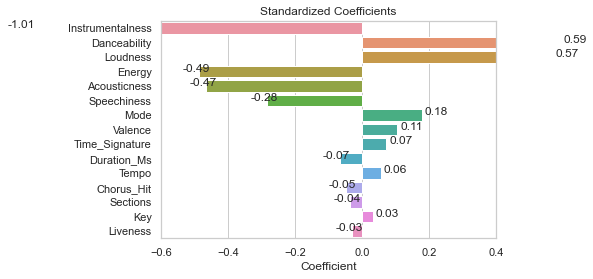

In [60]:
def plot_coef(X,y,features):
    """
    Plot the Beta values of a Logistic Regression based on the Features and Target Variable provided.
    """
    lr = LogisticRegression(solver='lbfgs')
    std_scaler = StandardScaler()
    X_train_std = std_scaler.fit_transform(X_train)
    lr.fit(X_train,Y_train)
    std_coef = lr.coef_.reshape(-1,1).tolist()
    feature_names = [feature.title() for feature in features]
    coef_df = pd.DataFrame(std_coef,index=feature_names,columns=['coef'])
    coef_df['abs'] = coef_df['coef'].abs()
    coef_df = coef_df.sort_values(by='abs',ascending=False).drop('abs',axis=1)
    ax = sns.barplot(coef_df['coef'],coef_df.index)
    for i, row in enumerate(coef_df.iterrows()):
        row_values = row[1]
        if row_values.coef < 0:
            ax.text(row_values.coef - 0.05,i,round(row_values.coef,2))
        else:
            ax.text(row_values.coef + 0.01,i,round(row_values.coef,2))
    _ = plt.xlabel('Coefficient')
    _ = plt.title('Standardized Coefficients')
    _ = plt.xlim(-0.6,0.4)

plot_coef(X_train,Y_train,feature_names)

Using Logistic Regression Beta based on standardized values allows us to evaluate the relative importance of the features used. We can see at the top features to detect hits:
- Instrumentalness
- Danceability
- Loudness
- Energy
- Acousticness
- Speechiness

At the bottom we can see these features:
- Liveness
- Key
- Section
- Chorus_Hit
- Tempo

Interestingly, a continuous feature such as tempo seems to have very little influence on whether the model can become a hit or not. It might be interesting, if Tempo would perform better if the model was taking time/year into account. The Key feature expectedly scores low in weight, no surprise there.

We can also see that 
- Mode 
- Time Signature 

are performing better than expected. However, as we've evaluated in the EDA mode and time_signature features aren't convincing features, these could quickly change and might overfit our model rather than leading to actual higher accuracy.


In [61]:
# Remove more features
X = X.drop(['tempo','mode','key','time_signature','chorus_hit','liveness','sections'],axis=1)
X.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,duration_ms
0,0.578,0.471,-7.270,0.0289,0.368000,0.00000,0.532,196707
1,0.704,0.854,-5.477,0.1830,0.018500,0.00000,0.688,242587
2,0.162,0.836,-3.009,0.0473,0.000111,0.00457,0.300,338893
3,0.188,0.994,-3.745,0.1660,0.000007,0.07840,0.333,255667
4,0.630,0.764,-4.353,0.0275,0.363000,0.00000,0.631,193760


In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [63]:
X_train_sc, X_test_sc, scaler_sc = scale_data(X_train,X_test)

In [88]:
# Test Improvements in Logistic Regression
lr = run_lr(X_train_sc,Y_train)

LR Scores:  [0.79582036 0.80563691 0.8035634  0.79708499 0.79324104]
Mean ROC AUC Score: 0.7990693407826113
LR Score Range: 0.0124


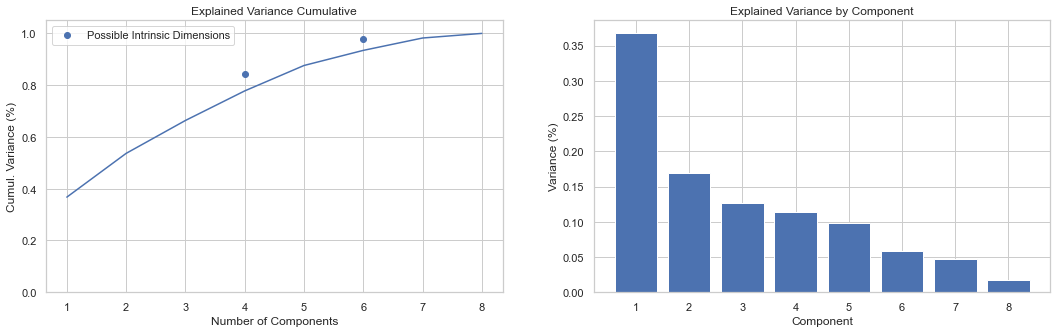

In [65]:
from sklearn.decomposition import PCA

#Fitting the PCA algorithm with our Data
pca = PCA()
pca.fit(X_train_sc)

#Plotting the Cumulative Summation of the Explained Variance
fig, ax = plt.subplots(1,2,figsize=(18,5))

plt.subplot(1,2,1)
explained_var_ratio = pca.explained_variance_ratio_
explained_cum_var = np.cumsum(explained_var_ratio)
_ = plt.plot(explained_cum_var)
_ = plt.xticks(np.arange(0,len(explained_cum_var)),np.arange(1,len(explained_cum_var) + 1) )
_ = plt.xlabel('Number of Components')
_ = plt.ylabel('Cumul. Variance (%)') #for each component
_ = plt.ylim(0,1+0.05)
_ = plt.title('Explained Variance Cumulative')
_ = plt.scatter([5,3],[0.98,0.845],label='Possible Intrinsic Dimensions')
_ = plt.legend(loc='upper left')

plt.subplot(1,2,2)
_ = plt.bar(np.arange(1, len(explained_var_ratio) + 1),explained_var_ratio)
_ = plt.xlabel('Component')
_ = plt.ylabel('Variance (%)') #for each component
_ = plt.title('Explained Variance by Component')

In [66]:
# Conduct the PCA with 4 components
pca4 = PCA(n_components=4)
X_train_reduced = pca4.fit_transform(X_train_sc)
X_test_reduced = pca4.transform(X_test_sc)

In [89]:
lr = run_lr(X_train_reduced,Y_train)

LR Scores:  [0.7420145  0.74590609 0.75016737 0.74850567 0.73579749]
Mean ROC AUC Score: 0.7444782265103869
LR Score Range: 0.0144


# optimizing using hyperparameter tuning 

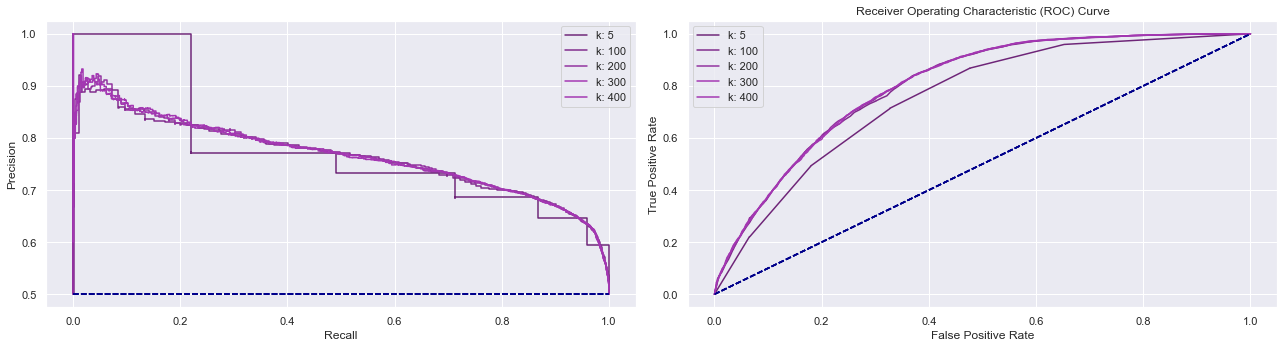

Max Precision-Recall AUC: 0.7669327286297332 at 300 estimators
Max ROC AUC: 0.8041179050073439 at 300 estimators


In [68]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve

# Set Seaborn Styles
sns.set()

# Set Color Palette that can be used for plotting
colorsP = ['#D28DDC','#CA7AD6','#C366D0','#BB53CA','#B340C3','#A337B2','#A437B3','#92319F','#802B8C','#6E2578']
colorsP = colorsP[::-1]


def plot_pr_curve(y_test,y_pred,hyperparameter,color,ax=False):
    """
    Plots the Precision and Recall curve and returns the Area-Under-The-Curve of Precision Recall Curve
    """
    precision,recall,threshold = precision_recall_curve(y_test,y_pred)
    
    if ax:
        _ = ax.step(recall,precision,label='k: {}'.format(hyperparameter),color=color)
        dumb = len(y_test[y_test>0])/len(y_test)
        _ = ax.plot([0,1],[dumb,dumb], color='darkblue', linestyle='--')
        _ = ax.set_xlabel('Recall')
        _ = ax.set_ylabel('Precision')
        
        ax.legend()
    else:
        _ = plt.step(recall,precision,label='k: {}'.format(hyperparameter),color=color)
        dumb = len(y_test[y_test>0])/len(y_test)
        _ = plt.plot([0,1],[dumb,dumb], color='darkblue', linestyle='--')
        _ = plt.xlabel('Recall')
        _ = plt.ylabel('Precision')
        
        plt.legend()
    
    pr_auc = auc(recall,precision)
    return pr_auc

# The ROC function
def plot_roc_curve(y_test, y_pred, hyperparameter,color,ax=False):  
    """
        Plot Roc Curve using predictions or probabilities
    """
    fpr, tpr, thresholds = roc_curve(y_test,y_pred)
    
    if ax:
        _ = ax.plot(fpr, tpr, label='k: {}'.format(hyperparameter),color=color)
        _ = ax.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        _ = ax.set_xlabel('False Positive Rate')
        _ = ax.set_ylabel('True Positive Rate')
        _ = ax.set_title('Receiver Operating Characteristic (ROC) Curve') 
        
        ax.legend()
    else:
        _ = plt.plot(fpr, tpr, label='k: {}'.format(hyperparameter),color=color)
        _ = plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        _ = plt.xlabel('False Positive Rate')
        _ = plt.ylabel('True Positive Rate')
        _ = plt.title('Receiver Operating Characteristic (ROC) Curve')
        
        plt.legend()
    
    roc_auc = roc_auc_score(Y_test,y_pred)
    return roc_auc

# Set the Estimators that should be tested
estimators = np.arange(0,500,100)
estimators[0] = 5
pr_aucs = np.empty(len(estimators))
roc_aucs = np.empty(len(estimators))

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(18,5))

colorsP = colorsP + colorsP

for i,k in enumerate(estimators):
    """
    Iterate of the estimators and plot PR curves as well as ROC curves
    """
    rf = RandomForestClassifier(n_estimators=k,random_state=42)
    rf.fit(X_train_reduced,Y_train)

    y_test_pred = rf.predict_proba(X_test_reduced).T[1]
    pr_auc = plot_pr_curve(Y_test,y_test_pred,k,colorsP[i],ax=ax1)
    roc_auc = plot_roc_curve(Y_test,y_test_pred,k,colorsP[i],ax=ax2)
    pr_aucs[i] = pr_auc
    roc_aucs[i] = roc_auc
    
_ = plt.tight_layout()

plt.show()

best_pr = pr_aucs.max()
best_pr_k = estimators[np.where(pr_aucs == best_pr)[0]][0]
best_roc_auc = roc_aucs.max()
best_roc_auc_k = estimators[np.where(roc_aucs == best_roc_auc)[0]][0]

print("Max Precision-Recall AUC: {} at {} estimators".format(best_pr,best_pr_k))
print("Max ROC AUC: {} at {} estimators".format(best_roc_auc,best_roc_auc_k))

In [69]:
#with hyperparameter tuning 
rf = RandomForestClassifier(
    n_estimators=300, criterion='gini', max_depth=9,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
    min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None,
    random_state=4, verbose=0, warm_start=False, class_weight=None
)

In [70]:
rf.fit(X_train, Y_train)
rf_predict = rf.predict(X_test)
rf_accuracy = accuracy_score(Y_test, rf_predict)
print("Accuracy: " + str(rf_accuracy))

rf_AUC = roc_auc_score(Y_test, rf_predict) 
print("AUC: " + str(rf_AUC))

Accuracy: 0.774264169301873
AUC: 0.7742172528479792


In [71]:
cm_rf = confusion_matrix(Y_test, rf_predict)
print(cm_rf)

[[2785 1324]
 [ 532 3581]]


In [72]:
performance(cm_rf)

Sensitivity :  0.8706540238268904
Specificity :  0.6777804818690679
Precision :  0.7300713557594292
Negative predictive value :  0.8396141091347603
False positive rate :  0.3222195181309321
False negative rate :  0.12934597617310964
False discovery rate :  0.26992864424057084
Accuracy :  0.774264169301873


In [73]:
# Classification Report 
print(classification_report(Y_test, rf_predict))

              precision    recall  f1-score   support

           0       0.84      0.68      0.75      4109
           1       0.73      0.87      0.79      4113

    accuracy                           0.77      8222
   macro avg       0.78      0.77      0.77      8222
weighted avg       0.78      0.77      0.77      8222

